# Binary Classifier

This notebook will demonstrate baseline binary text classification approaches to classify the excerpts from the given datasets into classes 1 (accountability) or 0 (not accountability). The given datasets are new articles excerpts from news articles about three shooting events. Accountability class refers to if the excerpt is talking about accountability for the crime.

## Import Data and Libraries

In [23]:
import nltk
import numpy as np
import pandas as pd
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem import snowball, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt
from binary_classifier import *

## Run the Classifiers


Three classifiers were implemented in the python file "binary_classifier", and each classifier was tested with both the count vector and tfidf vector. The best results from each classifier are printed as output as the function "find_best_classifier" runs. The results output include the predicted classes, the true classes and the excerpts from the test set, the fitted best classifier, and the vectorizer that was used.

### Isla Vista Results

The results show that all classifiers performance was very similar, though in this data set Isla vista, the best was the ensemble method random forest.

####  Classifier Results

In [24]:
# Isla Vista
IslaVista_results = find_best_classifier(["Isla Vista - All Excerpts - 1_2_2019.xlsx"])

Excerpt column: Excerpt
tfidf vector SVC results:
[[1193   53]
 [  77  303]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1246
           1       0.85      0.80      0.82       380

    accuracy                           0.92      1626
   macro avg       0.90      0.88      0.89      1626
weighted avg       0.92      0.92      0.92      1626

count vector LogisticRegression results:
[[1185   61]
 [  68  312]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1246
           1       0.84      0.82      0.83       380

    accuracy                           0.92      1626
   macro avg       0.89      0.89      0.89      1626
weighted avg       0.92      0.92      0.92      1626

tfidf vector RandomForestClassifier results:
[[1224   22]
 [  87  293]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1246
           1       0

#### Feature Importances

The following plot displays the results of the classifier, including the most influential features from the feature importances of the fitted random forest model.

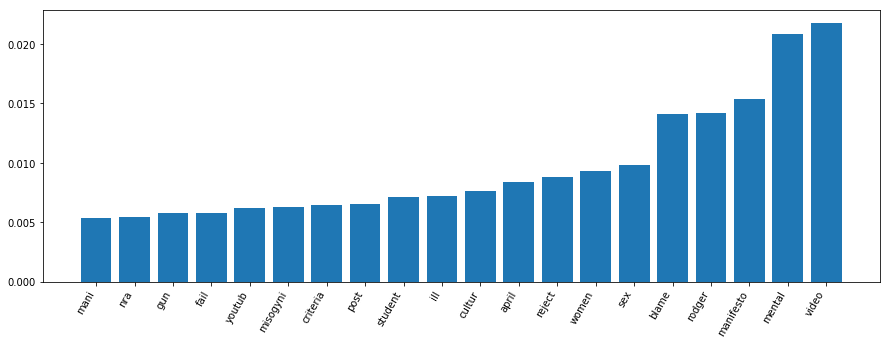

In [42]:
cv = IslaVista_results['vectorizer']
plot_coefficients(IslaVista_results['classifier'].feature_importances_, cv.get_feature_names(), show_neg = False)

### Full Data Results

The same procedure was tested on the news articles from three shooting events, including Isla Vista, Mayrsville, and Newton. The results are much worse than the results on Isla Vista alone, and also, the best classifier chosen was completely different: support vector machine (svm) with count vectors.

#### Classifier Results

In [2]:
# full data
results = find_best_classifier()

Excerpt column: Excerpt
Excerpt column: Excerpt
Excerpt column: Excerpt Copy
count vector SVC results:
[[3627  143]
 [ 215  390]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3770
           1       0.73      0.64      0.69       605

    accuracy                           0.92      4375
   macro avg       0.84      0.80      0.82      4375
weighted avg       0.91      0.92      0.92      4375

count vector LogisticRegression results:
[[3650  120]
 [ 235  370]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3770
           1       0.76      0.61      0.68       605

    accuracy                           0.92      4375
   macro avg       0.85      0.79      0.81      4375
weighted avg       0.91      0.92      0.92      4375

count vector RandomForestClassifier results:
[[3720   50]
 [ 288  317]]
              precision    recall  f1-score   support

           0       0.

#### Feature Importances

The following plot displays the results of the classifier, including the most influential features for class 1 in blue, and the most influential features for class 0 in red from the coefficients of the fitted svm model.

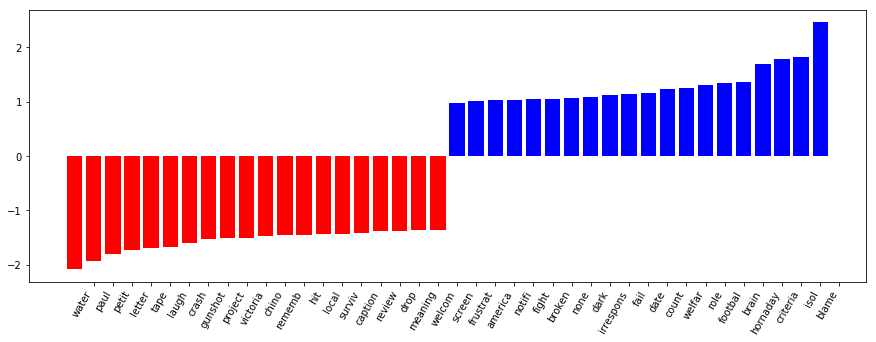

In [43]:
cv = results['vectorizer']
classi = results['classifier']
plot_coefficients(classi.coef_, cv.get_feature_names())

#### View examples of false positives

Determine the top 20 most influential words for predicting a class as accountability, and use this to view documents that were misclassified as accountability and also contain these terms.

In [50]:
account_ratio = []
incorrect1_toks = []

top_features =20
coef = classi.coef_.ravel()

top_positive_coefficients = np.argsort(coef)[-top_features:]
top_words = [list(cv.get_feature_names())[idx] for idx in top_positive_coefficients]

In [68]:
# documents incorrectly predicted with label 1
y_pred = results['predicted']
y_test = results['actual']
exs = results['test_excerpts']

incorrect1_ids = [idx for idx in range(0,len(docs_test)) 
              if (y_test[idx]==0 and y_pred[idx] == 1)]
incorrect1_exs = [exs[idx] for idx in incorrect1_ids]

In [63]:
for i in range(len(incorrect1_exs)):
    toks = stem_tokenizer(incorrect1_exs[i]).split(" ")
    account_toks = [word for word in toks if word in top_words]
    incorrect1_toks.append(account_toks)
    account_ratio.append(len(account_toks)/(len(toks)))

In [67]:
example_ids = np.argsort(-np.array(account_ratio))

for example_id in example_ids[0:10]:
    excerpt = incorrect1_exs[example_id]
    acc_toks = incorrect1_toks[example_id]
    print(excerpt)
    print(acc_toks)
    print(str("****************"))

Yes, Rodger was depressed, socially isolated and desperately lonely.
['isol']
****************
I spent a lot of last weekend fighting back tears as I contemplated this most profound of questions.
['fight']
****************
The Washington Post offered an excellent example of this over the weekend, when Ann Hornaday 

argued that the real culprit for Eliot Rodger's murder spree was ... Judd Apatow, James Bond and a bad Robert Downey flick that 
probably only Hornaday remembers. 
['hornaday', 'hornaday']
****************
Shaylee Bass, 15, a sophomore at the school, said Fryberg had recently gotten into a fight with another boy over a girl
['fight']
****************
Life is not fair,  he wrote in a 137-page manifesto that has now been posted
online.  One can either accept that fact, keeling over in defeat or one can
harness the strength to fight against it. My destiny was to fight against the
unfairness of the world.
['fight', 'fight']
****************
The madness continued in America last

#### View examples of false negatives

Determine the top 20 most influential words for predicting a class as not accountability, and use this to view documents that were misclassified as accountability and also contain these terms. Example false negaitve excerpts will be printed below.

In [ ]:
incorrect0_ids = [idx for idx in range(0,len(docs_test)) 
              if (y_test[idx]==1 and y_pred[idx] == 0)]
incorrect0_exs = [exs[idx] for idx in incorrect0_ids]

In [69]:
non_account_ratio = []
incorrect0_toks = []

top_negative_coefficients = np.argsort(coef)[:top_features]
top_words = [list(cv.get_feature_names())[idx] for idx in top_negative_coefficients]

for i in range(len(incorrect0_exs)):
    toks = stem_tokenizer(incorrect0_exs[i]).split(" ")
    account_toks = [word for word in toks if word in top_words]
    incorrect0_toks.append(account_toks)
    non_account_ratio.append(len(account_toks)/(len(toks)))

In [70]:
example_ids = np.argsort(-np.array(non_account_ratio))

for example_id in example_ids[0:10]:
    excerpt = incorrect0_exs[example_id]
    acc_toks = incorrect0_toks[example_id]
    print(excerpt)
    print(acc_toks)
    print(str("****************"))

The ban, which expired in 2004, would certainly have made a difference in the
number of children who survived the Newtown shooting. The shooter could not have
shot as many, as quickly, as he did.
['surviv']
****************
His mother knew he was a danger to himself and others and asked the local cops to pay him a visit. The police did go to the kids 
apartment, but saw no reason to lock him up. 
['local']
****************
The next time you want to call a woman a derogatory term because she doesnt show any interest in you, take a step back and remember 


thats the kind of thinking that caused Rodger to go off on his tantrums. 
['rememb']
****************
Jennifer Maksel, the mother of 7-year-old Sandy Hook survivor Bryce Maksel, testified that she had a hard time getting help from the local schools and hospital for her 12-year-old son who she said had Asperger's Syndrome, attention deficit-hyperactivity disorder and oppositional defiant disorder.
['local']
****************
The mass